## K-Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r"C:\Users\AK\Desktop\file\train data.csv")
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
train.drop(train.columns[[0]], axis=1, inplace=True)

In [5]:
train.loc[train['Mode_of_Shipment'] == 'Flight', 'Mode_of_Shipment'] = 1
train.loc[train['Mode_of_Shipment'] == 'Ship', 'Mode_of_Shipment'] = 2
train.loc[train['Mode_of_Shipment'] == 'Road', 'Mode_of_Shipment'] = 3


In [6]:
train.loc[train['Product_importance'] == 'high', 'Product_importance'] = 1
train.loc[train['Product_importance'] == 'low', 'Product_importance'] = 2
train.loc[train['Product_importance'] == 'medium', 'Product_importance'] = 3


In [7]:
train['Gender'] = train['Gender'].replace({'F': 1, 'M': 2})


In [8]:
train.loc[train['Warehouse_block'] == 'A', 'Warehouse_block'] = 1
train.loc[train['Warehouse_block'] == 'B', 'Warehouse_block'] = 2
train.loc[train['Warehouse_block'] == 'C', 'Warehouse_block'] = 3
train.loc[train['Warehouse_block'] == 'D', 'Warehouse_block'] = 4
train.loc[train['Warehouse_block'] == 'F', 'Warehouse_block'] = 5


In [9]:
train["Mode_of_Shipment"]= train["Mode_of_Shipment"].astype(int) 
train["Product_importance"]= train["Product_importance"].astype(int) 
train["Gender"]= train["Gender"].astype(int) 
train["Warehouse_block"]= train["Warehouse_block"].astype(int) 

In [10]:
data = train.rename(columns = {"Reached.on.Time_Y.N": "Reached_on_Time_Y_N"})

In [11]:
clustdata=data[(data.Reached_on_Time_Y_N == 1)]

In [12]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(clustdata)
    wcss.append(kmeans.inertia_)

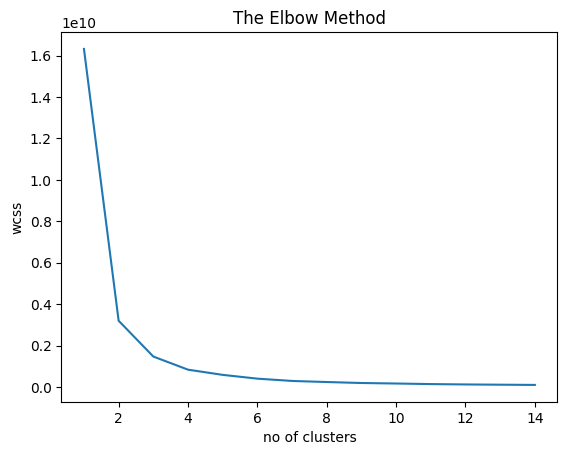

In [13]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', n_init=10)
c = km.fit_predict(clustdata) 
c

array([1, 1, 0, ..., 1, 1, 1])

In [54]:
clustdata.loc[:, "Cluster"] = c
clustdata.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Cluster
0,4,1,4,2,177,3,2,1,44,1233,1,1
1,5,1,4,5,216,2,2,2,59,3088,1,1
2,1,1,2,2,183,4,2,2,48,3374,1,0
3,2,1,3,3,176,4,3,2,10,1177,1,1
4,3,1,2,2,184,3,3,1,46,2484,1,1


In [55]:
clustdata.groupby(['Cluster']).mean()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
Cluster,,,,,,,,,,,
0,3.344379,1.986993,3.821617,3.020749,208.292970,3.354289,2.336946,1.507278,11.154227,4709.394240,1.0
1,3.335333,2.002400,4.155969,2.991302,206.317037,3.637373,2.330834,1.488602,25.936713,1881.134673,1.0


In [56]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize 
import scipy.cluster.hierarchy as shc 

In [57]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(clustdata) 

# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [59]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [60]:
c1 = km.fit_predict(X_principal) 
c1

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
result=pd.DataFrame({'P1' : X_principal.iloc[:,0] ,'P2' : X_principal.iloc[:,1]})
result['Cluster']=pd.Series(c1, index=result.index)
result.head()

,P1,P2,Cluster
0,0.643739,-0.287959,0
1,0.375784,-0.190540,0
2,-0.055187,-0.482007,1
3,0.405349,-0.125662,0
4,0.388859,-0.568817,0


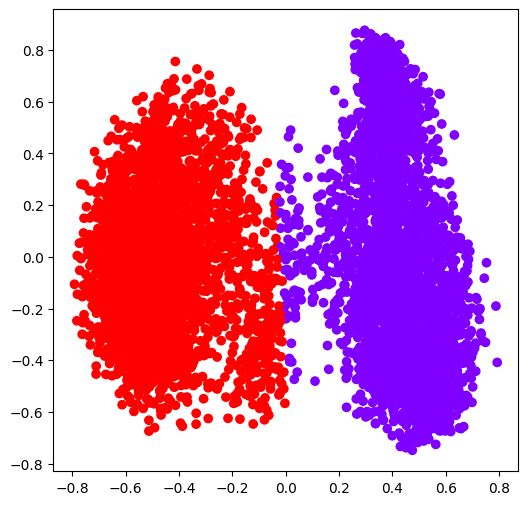

In [62]:
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(result.iloc[:,0],result.iloc[:,1],c=result['Cluster'], cmap ='rainbow') 
plt.show()

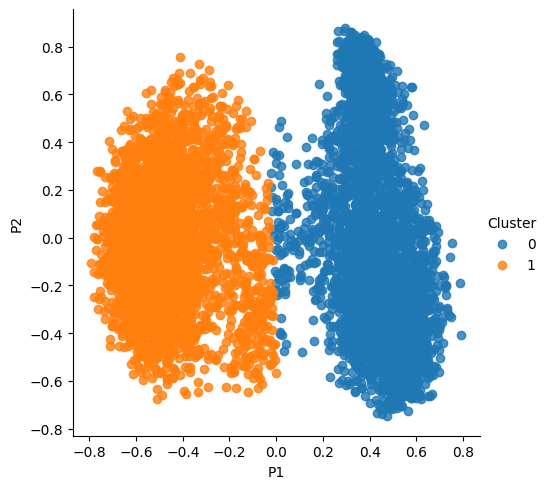

In [63]:
import seaborn as sns

facet = sns.lmplot(data=result, x='P1', y='P2', hue='Cluster', 
                   fit_reg=False, legend=True, facet_kws={'legend_out': True})
